In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier 

from IPython.display import Image
from sklearn import tree
from os import system

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,roc_auc_score

In [3]:
df = pd.read_csv(r"E:\AI-ML PYTHON\bank-full - Govindaraj V.csv",encoding='unicode_escape')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 17)

# Exploratory Data Analysis 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###  datatypes of each attribute

In [7]:
df.dtypes.to_frame('data types')

,data types
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


 - 10 features have object datatype and 7 have int datatype
 - As per given data we know that 10 features are of category type,so lets convert the datatype of those features


In [8]:
df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']]=df[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].astype('category')
df.dtypes.to_frame('data types')

,data types
age,int64
job,category
marital,category
education,category
default,category
balance,int64
housing,category
loan,category
contact,category
day,int64


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### 5 points summary understanding from describe:
 - Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
      - reason: mean and std(standard deviation) have high variance or difference
 - 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
     - Reason: if mean is less than std then it is right skewed  or else left skewed 
 - More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile 
 - Minimum balance is -8019 and maximum balance is 102127
 - Minimum age is 18 years and maximum is 95 years

 - pdays: number of days that passed by after the client  was last contacted from a previous campaign (numeric;  999 means client was not previously contacted) 


In [10]:
df.loc[df['pdays']==999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


 - All customers have been contacted previously


## check the missing values

In [11]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

 - In above cell, missing values are not found, so checking columns where unknown is mentioned
 - Checking columns which contain string data


In [12]:
df.isna().sum().to_frame('The presence of null values').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
The presence of null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [14]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [16]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [18]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [19]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [20]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [21]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:

df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

 - The dataset has unknown values in 'job','education','contact' and 'poutcome' columns


## Distribution of numerical columns(dist plots)

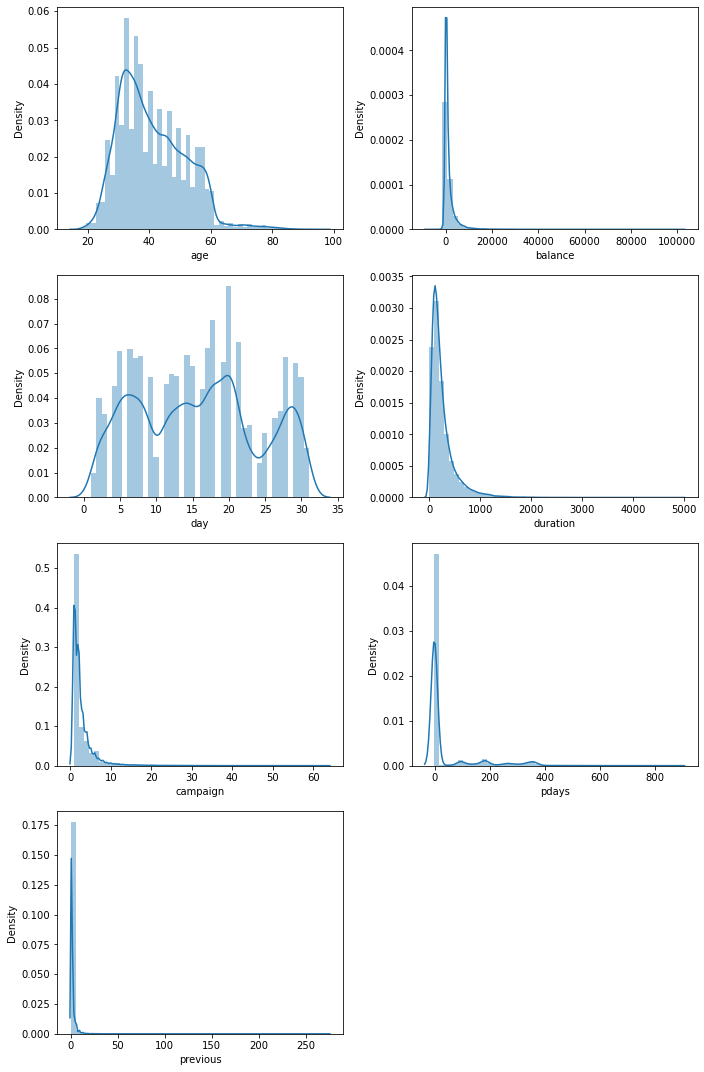

In [23]:
fig,axe = plt.subplots(nrows=4,ncols=2,figsize = (10,15))
axe = axe.flatten()

sns.distplot(df['age'],ax=axe[0]) 
sns.distplot(df['balance'],ax=axe[1])
sns.distplot(df['day'],ax=axe[2]) 
sns.distplot(df['duration'],ax=axe[3])
sns.distplot(df['campaign'],ax=axe[4])
sns.distplot(df['pdays'],ax=axe[5])
sns.distplot(df['previous'],ax=axe[6])


fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


### Understanding from distributions
 - 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
 - 'age' is somewhat normally distributed


## Distributions of categorical cols

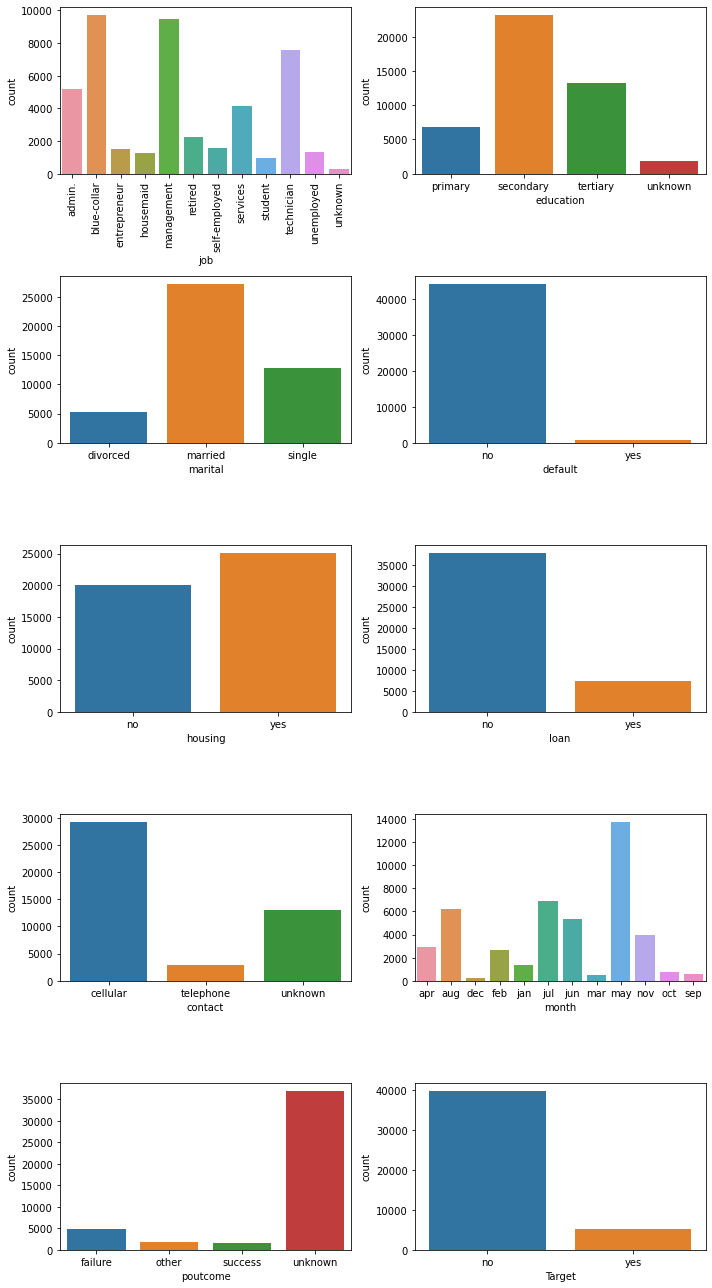

In [24]:
fig,axe = plt.subplots(nrows=5,ncols=2, figsize = (10,18))
axe = axe.flatten()

x = sns.countplot(df['job'],data=df,ax=axe[0]) # job xlabels are very compressed so need a clear labeling
plt.setp(x.get_xticklabels(),rotation = 90) # to setp labels in 90 deg rotation 

sns.countplot(df['education'],data=df,ax=axe[1])
sns.countplot(df['marital'],data=df,ax=axe[2])
sns.countplot(df['default'],data=df,ax=axe[3])
sns.countplot(df['housing'],data=df,ax=axe[4])
sns.countplot(df['loan'],data=df,ax=axe[5])
sns.countplot(df['contact'],data=df,ax=axe[6])
sns.countplot(df['month'],data=df,ax=axe[7])
sns.countplot(df['poutcome'],data=df,ax=axe[8])
sns.countplot(df['Target'],data=df,ax=axe[9])

fig.tight_layout()
fig.show()


### Understanding from distributions

 - More than 90% customers have no default credit
 - Around 88% customers have not subscribed for term deposit
 - Most customers have been contacted in may
 - Most customers have been contacted by cellular network(mobile phone)
 - Number of customers who have housing loan is more than the number of customers who don't have housing loan
 - Around 6% customers have credit in default

## Measure of skewness of numerical data


In [25]:
df.skew().to_frame('skewness measure').T

,age,balance,day,duration,campaign,pdays,previous
skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# check the outliers

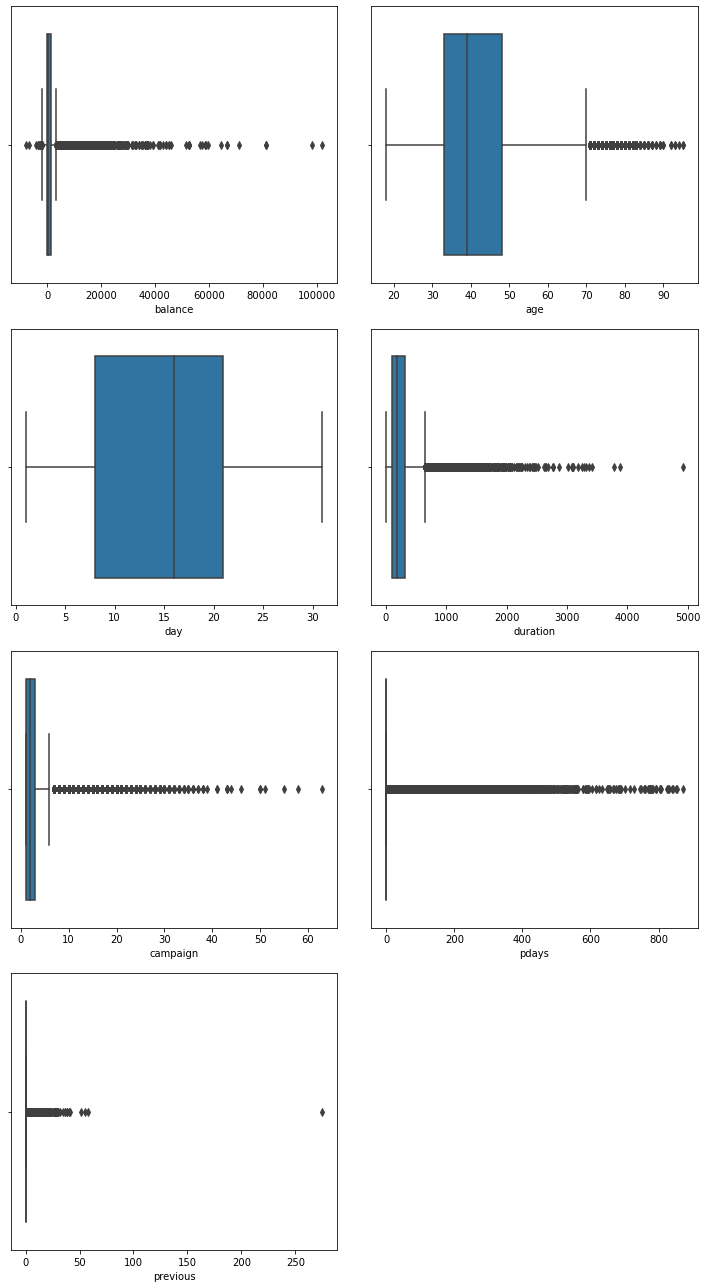

In [26]:
fig,axe = plt.subplots(nrows=4,ncols=2, figsize = (10,18))
axe = axe.flatten()

sns.boxplot(df['balance'],data=df,ax=axe[0])
sns.boxplot(df['age'],data=df,ax=axe[1])
sns.boxplot(df['day'],data=df,ax=axe[2])
sns.boxplot(df['duration'],data=df,ax=axe[3])
sns.boxplot(df['campaign'],data=df,ax=axe[4])
sns.boxplot(df['pdays'],data=df,ax=axe[5])
sns.boxplot(df['previous'],data=df,ax=axe[6])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)


### Understanding from boxplots
- the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
- Values less than 0 are present in 'Balance' column

## TARGET DISTRIBUTIONS 


In [27]:
df['Target'].value_counts().to_frame('Target column Distribution')

,Target column Distribution
no,39922
yes,5289


 - From the above values data is imbalanced 

# Data preprocessing

## Label encoding

In [28]:
data = df.copy()
encoder = LabelEncoder()

data['default'] = encoder.fit_transform(data['default']).astype('int')
data['education'] = encoder.fit_transform(data['education']).astype('int')
data['marital'] = encoder.fit_transform(data['marital']).astype('int')
data['housing'] = encoder.fit_transform(data['housing']).astype('int')
data['contact'] = encoder.fit_transform(data['contact']).astype('int')
data['loan'] = encoder.fit_transform(data['loan']).astype('int')
data['month'] = encoder.fit_transform(data['month']).astype('int')
data['poutcome'] = encoder.fit_transform(data['poutcome']).astype('int')
data['Target'] = encoder.fit_transform(data['Target']).astype('int')
data['job'] = encoder.fit_transform(data['default']).astype('int')

data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,0,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,0,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,0,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0


## Checking & modifying datatypes after Label Encoding
 - convert into the category type to prevent category features  from numerical misclassification or computation

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [30]:
data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = data[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)

In [31]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,0,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,0,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,0,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling outliers with mean replacement
 - as far as now data preprocessed with label encoder and conveted back to category type
 - now perform the outliers 

Boxplots after handeling outliers


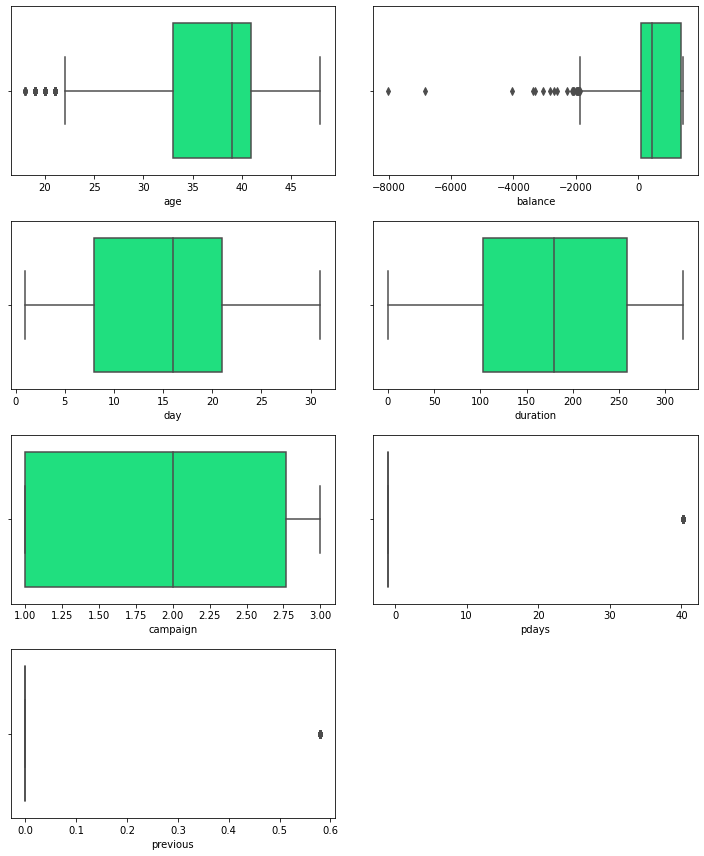

In [33]:
mean_bal = float(data['balance'].mean())
data['balance'] = np.where(data['balance'] > np.percentile(data['balance'],75),mean_bal,data['balance'])

mean_age = float(data['age'].mean())
data['age'] = np.where(data['age'] > np.percentile(data['age'],75), mean_age , data['age'])

mean_dur = float(data['duration'].mean())
data['duration'] = np.where(data['duration']> np.percentile(data['duration'],75), mean_dur, data['duration'])

mean_cam = float(data['campaign'].mean())
data['campaign'] = np.where(data['campaign']> np.percentile(data['campaign'],75), mean_cam, data['campaign'])

mean_pdays = float(data['pdays'].mean())
data['pdays'] = np.where(data['pdays']> np.percentile(data['pdays'],75), mean_pdays, data['pdays'])

mean_prev = float(data['previous'].mean())
data['previous'] = np.where(data['previous']> np.percentile(data['previous'],75), mean_prev, data['previous'])



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()
sns.boxplot(x='age',data=data,color='springgreen',ax=axe[0])  
sns.boxplot(x='balance',data=data,color='springgreen',ax=axe[1])  
sns.boxplot(x='day',data=data,color='springgreen',ax=axe[2]) 
sns.boxplot(x='duration',data=data,color='springgreen',ax=axe[3]) 
sns.boxplot(x='campaign',data=data,color='springgreen',ax=axe[4])  
sns.boxplot(x='pdays',data=data,color='springgreen',ax=axe[5]) 
sns.boxplot(x='previous',data=data,color='springgreen',ax=axe[6]) 
fig.tight_layout() 
fig.show() 
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')



### Understanding from boxplot outliers handling
- Outliers in 'age' column are not handled because it is a specific value for each record.
- After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

## corr and plot of all features

In [34]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

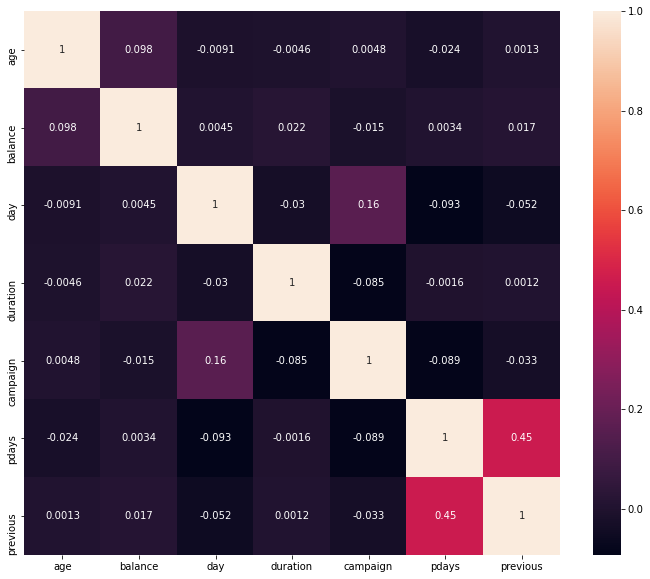

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

### understanding from correlation
- as there are no any highly correlated or noise 


### Removing columns which are junk to required target
 - 'job','education' and 'contact' attributes contain multiple unknown values.
 - As they are specific string values and not numerical so cannot be treated with median, mean replacement
 - As per data description, duration attribute is removed to have a realistic prediction.
 - 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
 - Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing  -    campaign. Which can help in better training and testing of models.



In [36]:
data = data.drop(['job','education','contact','duration','day','month'],axis=1) 
data.head() 

,age,marital,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,40.93621,1,0,1362.272058,1,0,1.0,-1.0,0.0,3,0
1,44.00000,2,0,29.000000,1,0,1.0,-1.0,0.0,3,0
2,33.00000,1,0,2.000000,1,1,1.0,-1.0,0.0,3,0
3,47.00000,1,0,1362.272058,1,0,1.0,-1.0,0.0,3,0
4,33.00000,2,0,1.000000,0,0,1.0,-1.0,0.0,3,0


## Data visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

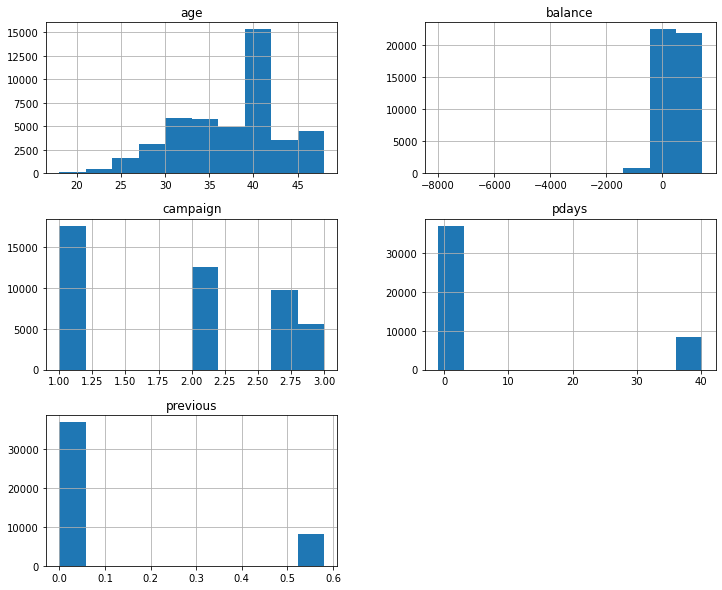

In [37]:
data.hist(figsize=(12,10)) 


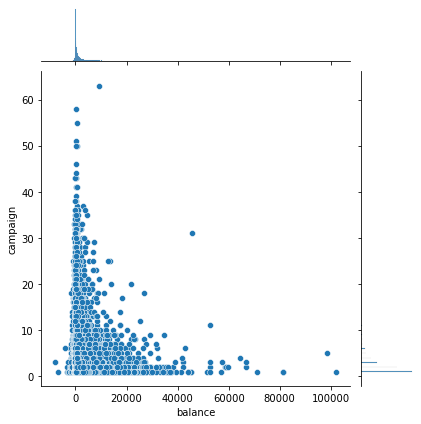

In [38]:
sns.jointplot(df['balance'],df['campaign']) 

<AxesSubplot:xlabel='education', ylabel='balance'>

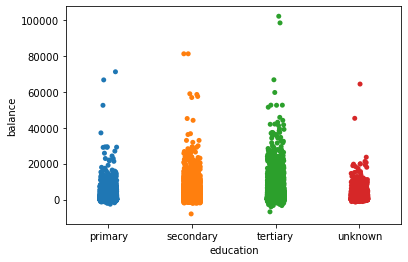

In [39]:
sns.stripplot(df['education'],df['balance']) 

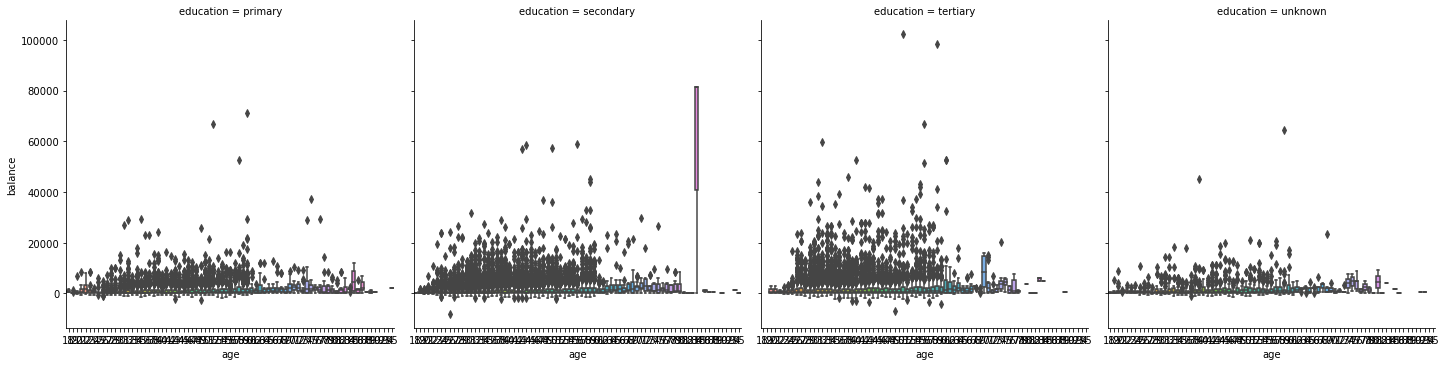

In [40]:
sns.catplot(x='age',y='balance',col='education',data=df,kind='box') 


<AxesSubplot:>

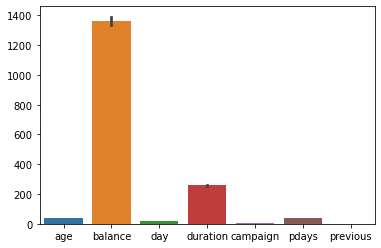

In [41]:
sns.barplot(data=df)

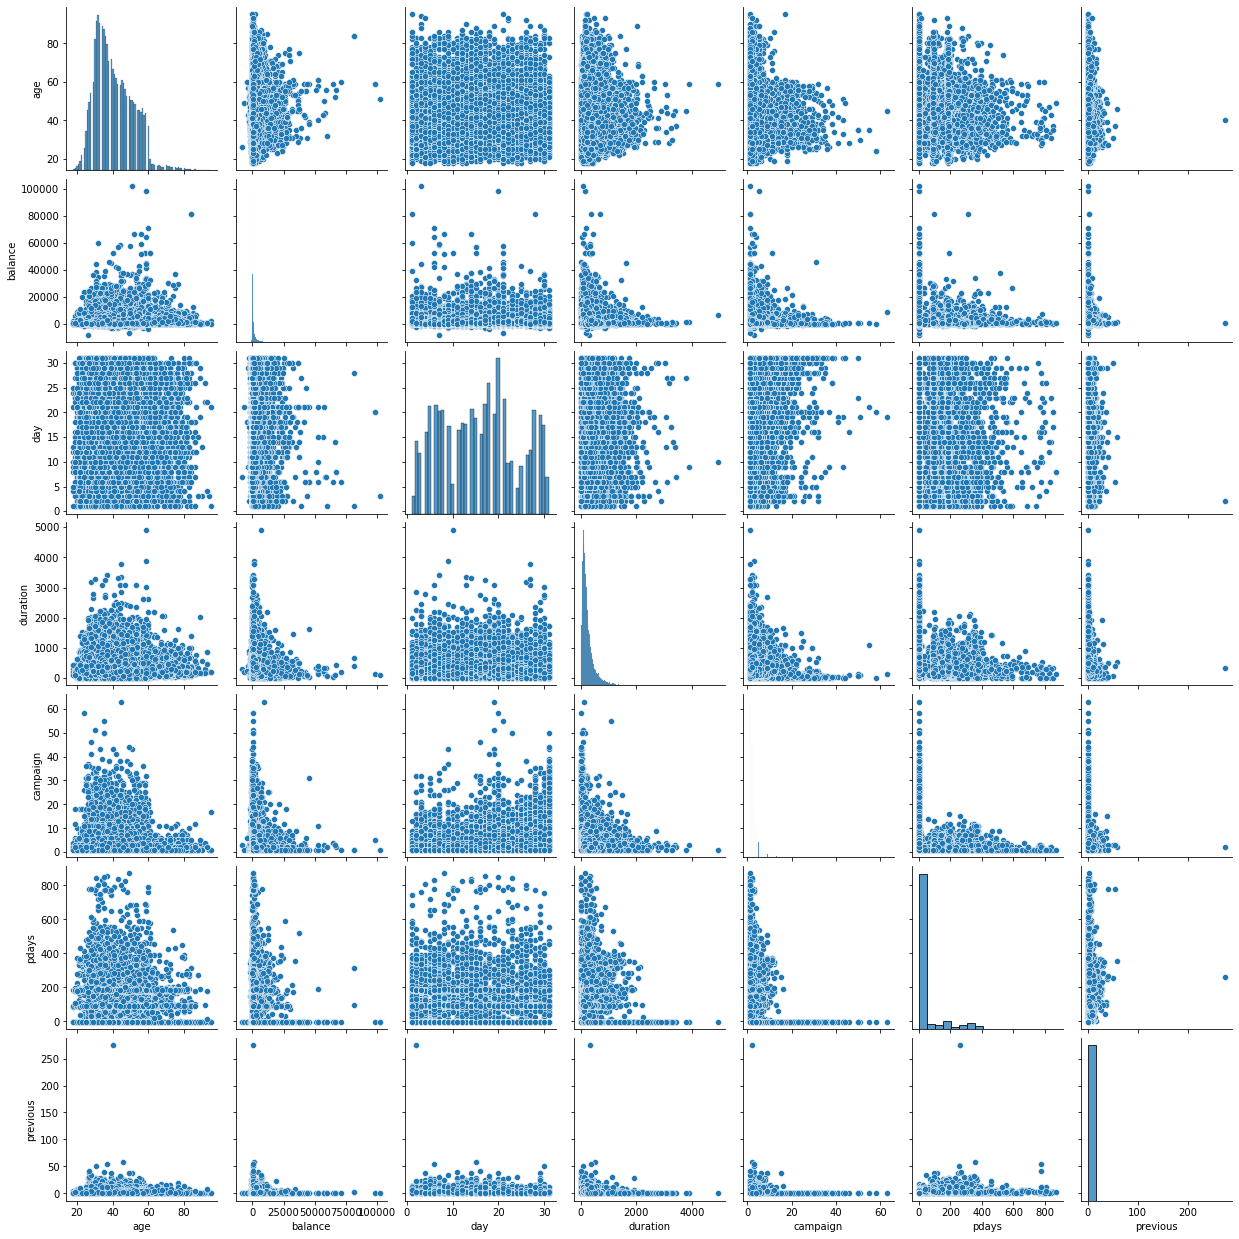

In [42]:
sns.pairplot(df)

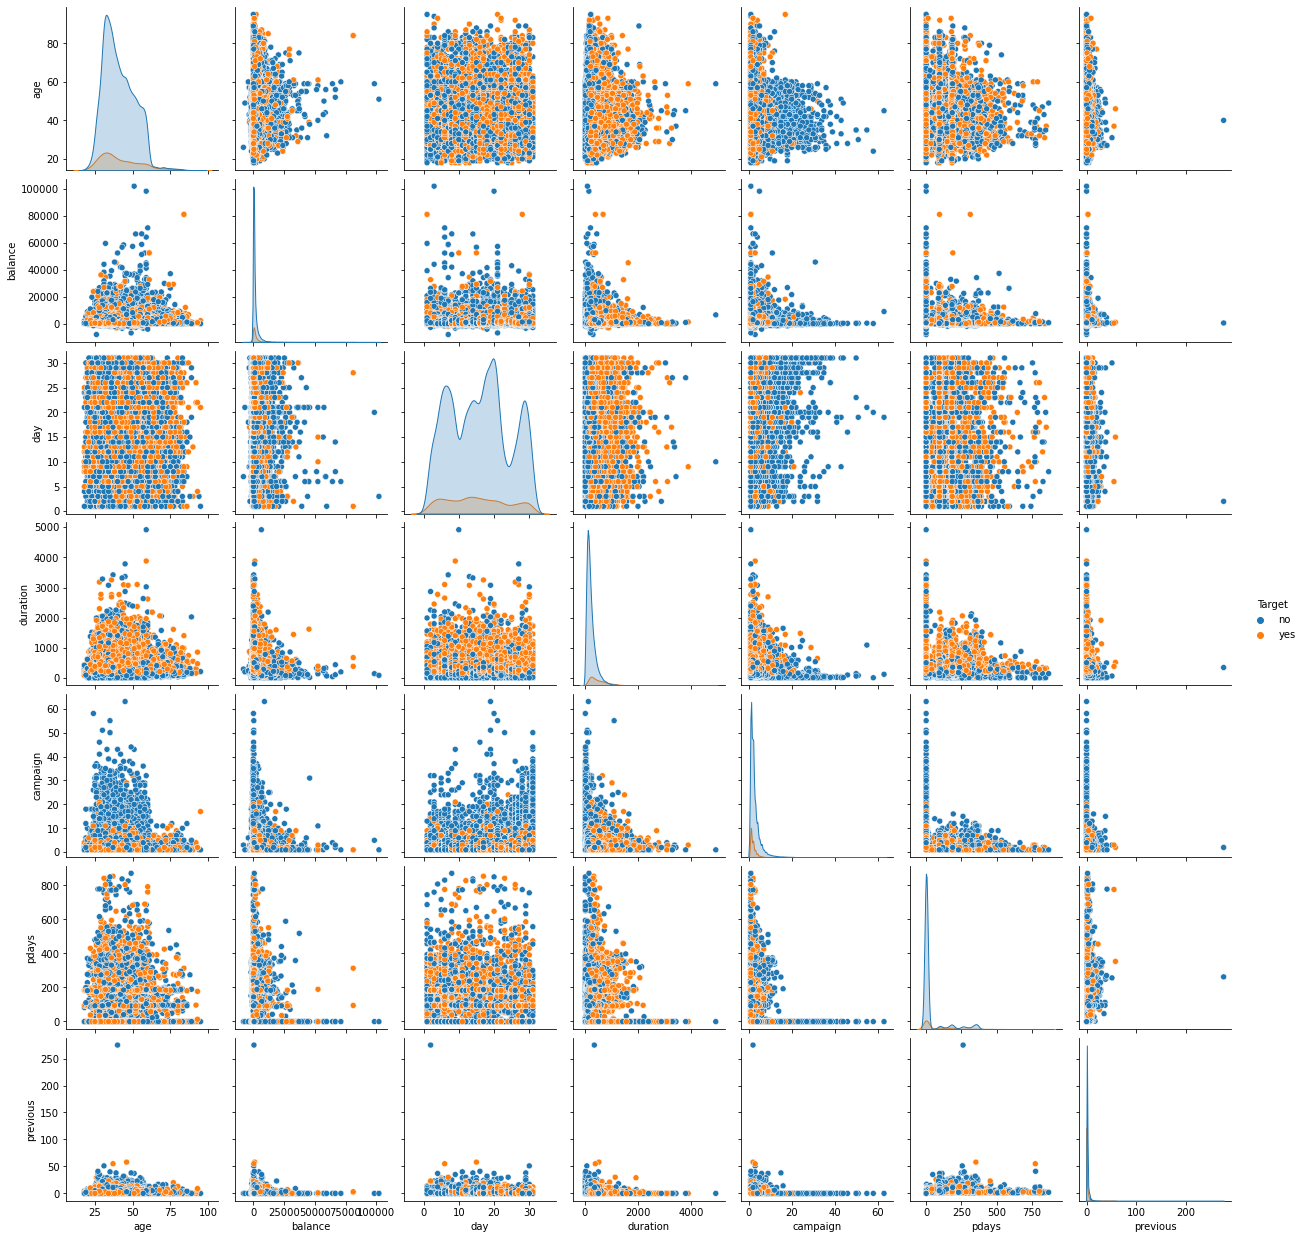

In [43]:
sns.pairplot(df,hue='Target')

## Train Test Split


In [44]:
x = data.drop('Target', axis=1)
y = data.pop('Target')

In [45]:
X_train,X_test, y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.3) 

# Scaling the X 

In [46]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


# Models:

## Base model

In [47]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

logaccuracy = accuracy_score(y_test,y_pred)*100
print(f'log_accuracy score: {logaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_pred)
print('classification report: ')
print(report)

log_accuracy score: 89.41


confusion matrix: 
[[11888   125]
 [ 1311   240]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.15      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



In [48]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_prednb = NB.predict(X_test)

NBaccuracy = accuracy_score(y_test,y_prednb)*100
print(f'NBaccuracy score: {NBaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_prednb)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_prednb)
print('classification report: ')
print(report)

NBaccuracy score: 80.52


confusion matrix: 
[[10375  1638]
 [ 1004   547]]


classification report: 
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     12013
           1       0.25      0.35      0.29      1551

    accuracy                           0.81     13564
   macro avg       0.58      0.61      0.59     13564
weighted avg       0.84      0.81      0.82     13564



In [49]:
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(X_train, y_train)
y_predknn =  knn.predict(X_test)

knnaccuracy = accuracy_score(y_test,y_predknn)*100
print(f'knn_accuracy score: {knnaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predknn)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predknn)
print('classification report: ')
print(report)

knn_accuracy score: 87.28


confusion matrix: 
[[11534   479]
 [ 1247   304]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.39      0.20      0.26      1551

    accuracy                           0.87     13564
   macro avg       0.65      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



### checking the optimal k value 

In [50]:
errors = []

for i in range(1,40):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(X_train,y_train)
    y_pr = knn1.predict(X_test)
    errors.append(np.mean(y_test!=y_pr))
    

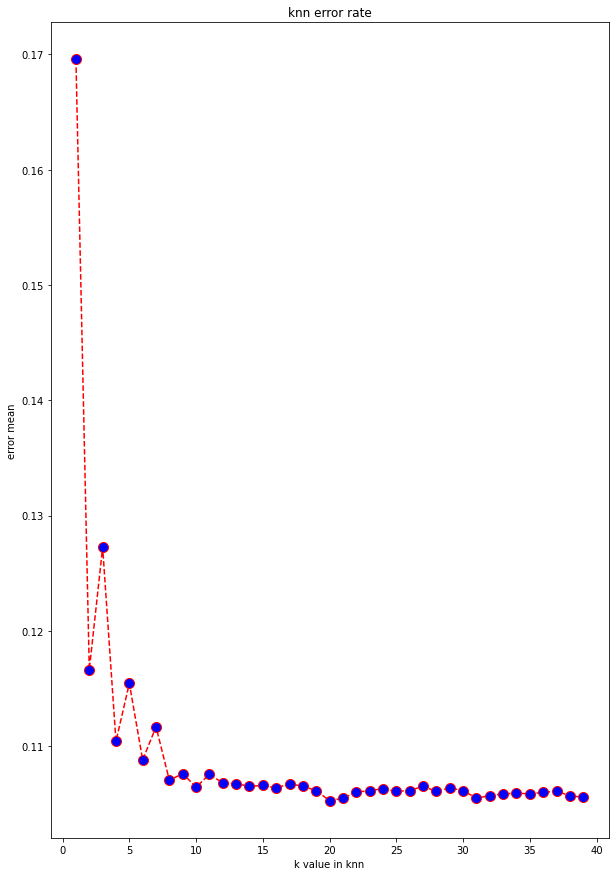

In [51]:
plt.figure(figsize=(10,15))
plt.plot(range(1,40),errors,color='red',linestyle='--',marker='o',markerfacecolor='blue',markersize='10')
plt.title('knn error rate')
plt.xlabel('k value in knn')
plt.ylabel('error mean')
plt.show()

 - the optimum k value is 10

# SVC 

In [52]:
svc = SVC()
svc.fit(X_train, y_train)
y_predsvc = svc.predict(X_test)

svcaccuracy = accuracy_score(y_test,y_predsvc)*100
print(f'svc_accuracy score: {svcaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predsvc)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predsvc)
print('classification report: ')
print(report)

svc_accuracy score: 89.57


confusion matrix: 
[[11865   148]
 [ 1267   284]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.29      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.59      0.62     13564
weighted avg       0.88      0.90      0.87     13564



In [53]:
dct = DecisionTreeClassifier(criterion= 'gini',random_state=0)
dct.fit(X_train,y_train)
y_preddct = dct.predict(X_test)

dctaccuracy = accuracy_score(y_test,y_preddct)*100
print(f'dct_accuracy score: {dctaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_preddct)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_preddct)
print('classification report: ')
print(report)

dct_accuracy score: 84.40


confusion matrix: 
[[11104   909]
 [ 1207   344]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.22      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.59      0.57      0.58     13564
weighted avg       0.83      0.84      0.84     13564



### Feature importance test of decision tree

In [54]:
xvar = data  #variables in x
feature_cols = xvar.columns  # columns in x
feature_imp = dct.tree_.compute_feature_importances(normalize = False)  #compute feature importance

feat_imp_dict = dict(zip(feature_cols,dct.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')  #conversion of dictionary to dataframe
feat_imp.sort_values(by = 0, ascending=False)    #sort in descending order

,0
balance,0.490193
age,0.192676
poutcome,0.099716
campaign,0.072299
marital,0.049064
pdays,0.036910
loan,0.030828
housing,0.023917
default,0.004397
previous,0.000000


### Pruning of Decision Tree¶


In [55]:
dctr = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=0)
dctr.fit(X_train,y_train)
y_preddct1 = dctr.predict(X_test)

dctraccuracy = accuracy_score(y_test,y_preddct1)*100
print(f'dctr_accuracy score: {dctraccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_preddct1)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_preddct1)
print('classification report: ')
print(report)

dctr_accuracy score: 89.55


confusion matrix: 
[[11849   164]
 [ 1254   297]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.64      0.19      0.30      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



[Text(167.4, 190.26, 'X[7] <= 0.826\ngini = 0.208\nsamples = 31647\nvalue = [27909, 3738]'),
 Text(83.7, 135.9, 'X[4] <= -0.114\ngini = 0.169\nsamples = 25897\nvalue = [23483, 2414]'),
 Text(41.85, 81.53999999999999, 'X[0] <= -1.81\ngini = 0.218\nsamples = 11884\nvalue = [10406, 1478]'),
 Text(20.925, 27.180000000000007, 'gini = 0.418\nsamples = 575\nvalue = [404, 171]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.204\nsamples = 11309\nvalue = [10002, 1307]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.541\ngini = 0.125\nsamples = 14013\nvalue = [13077, 936]'),
 Text(104.625, 27.180000000000007, 'gini = 0.111\nsamples = 10204\nvalue = [9600, 604]'),
 Text(146.475, 27.180000000000007, 'gini = 0.159\nsamples = 3809\nvalue = [3477, 332]'),
 Text(251.10000000000002, 135.9, 'X[9] <= -1.075\ngini = 0.354\nsamples = 5750\nvalue = [4426, 1324]'),
 Text(209.25, 81.53999999999999, 'X[4] <= -0.114\ngini = 0.236\nsamples = 4695\nvalue = [4054, 641]'),
 Text(188.3250000000

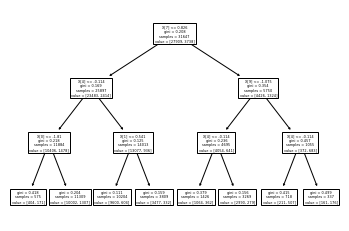

In [56]:
tree.plot_tree(dctr) 

In [57]:
from sklearn.tree import export_text 
text_representation = tree.export_text(dctr)
print(text_representation) 


|--- feature_7 <= 0.83
|   |--- feature_4 <= -0.11
|   |   |--- feature_0 <= -1.81
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.81
|   |   |   |--- class: 0
|   |--- feature_4 >  -0.11
|   |   |--- feature_1 <= 0.54
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.54
|   |   |   |--- class: 0
|--- feature_7 >  0.83
|   |--- feature_9 <= -1.08
|   |   |--- feature_4 <= -0.11
|   |   |   |--- class: 0
|   |   |--- feature_4 >  -0.11
|   |   |   |--- class: 0
|   |--- feature_9 >  -1.08
|   |   |--- feature_4 <= -0.11
|   |   |   |--- class: 1
|   |   |--- feature_4 >  -0.11
|   |   |   |--- class: 1



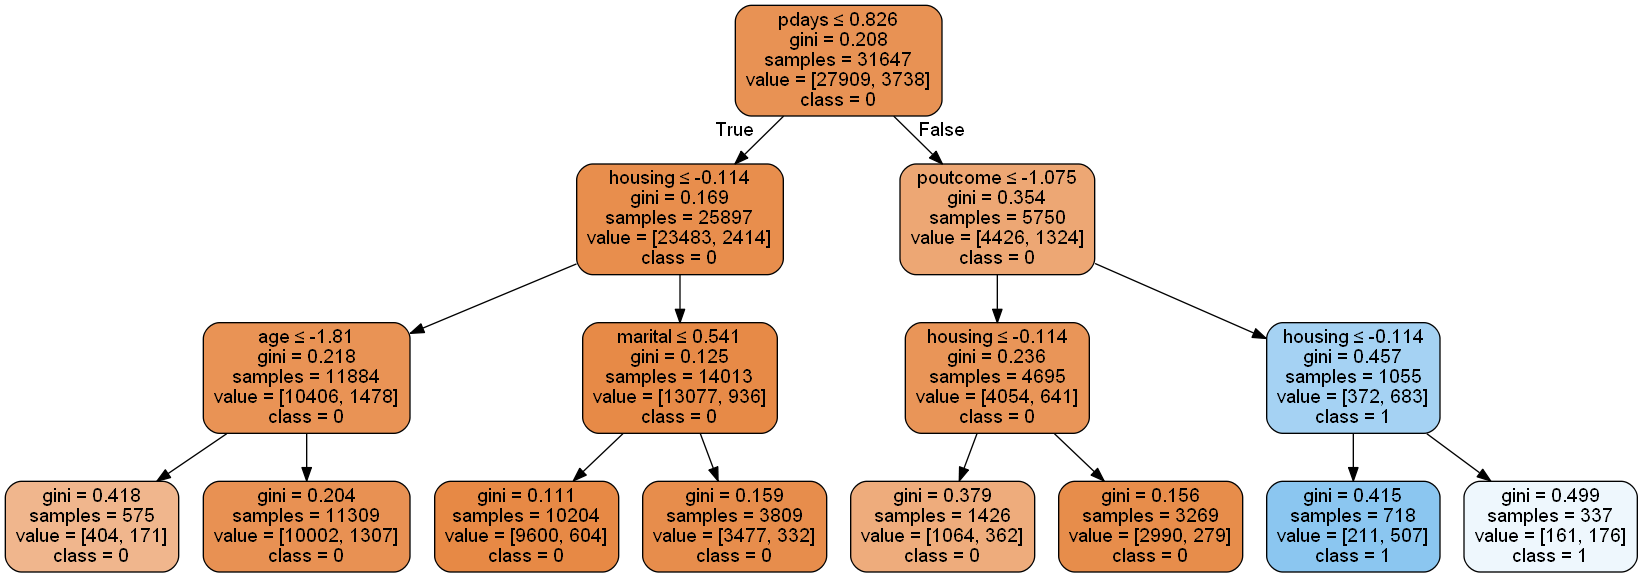

In [58]:
from sklearn.tree import export_graphviz
from io import StringIO

import graphviz
import pydotplus

dot_data = StringIO() 
export_graphviz(dctr, out_file=dot_data,
               filled = True, rounded = True,
               special_characters = True, feature_names = feature_cols, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT.png')
Image(graph.create_png())

In [59]:
xvar = data
feature_cols = xvar.columns
feat_importance1 = dctr.tree_.compute_feature_importances(normalize = False)

feat_imp_dict1 = dict(zip(feature_cols, dctr.feature_importances_))
feat_imp1 = pd.DataFrame.from_dict(feat_imp_dict1, orient = 'index')
feat_imp1.sort_values(by=0, ascending=False) 

,0
poutcome,0.575407
pdays,0.226181
housing,0.146561
age,0.046297
marital,0.005553
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000
previous,0.000000


# Bagging

In [60]:
bag_cls = BaggingClassifier(base_estimator = dct, n_estimators=200, random_state=1 )
bag_cls.fit(X_train, y_train)
y_predBag = bag_cls.predict(X_test)

bagaccuracy = accuracy_score(y_test,y_predBag)*100
print(f'bagaccuracy score: {bagaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predBag)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predBag)
print('classification report: ')
print(report)

bagaccuracy score: 88.12


confusion matrix: 
[[11633   380]
 [ 1232   319]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     12013
           1       0.46      0.21      0.28      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



In [61]:
Rnd_cls = RandomForestClassifier( n_estimators=200, random_state=1, max_features=3 )
Rnd_cls.fit(X_train, y_train)
y_predRnd = Rnd_cls.predict(X_test)

Rndaccuracy = accuracy_score(y_test,y_predRnd)*100
print(f'Rndaccuracy score: {Rndaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predRnd)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predRnd)
print('classification report: ')
print(report)

Rndaccuracy score: 87.58


confusion matrix: 
[[11561   452]
 [ 1232   319]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12013
           1       0.41      0.21      0.27      1551

    accuracy                           0.88     13564
   macro avg       0.66      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



In [62]:
ext_clf = ExtraTreesClassifier( n_estimators=200, random_state=1, max_features=3 )
ext_clf.fit(X_train, y_train)
y_predExt = ext_clf.predict(X_test)

extaccuracy = accuracy_score(y_test,y_predExt)*100
print(f'ext_accuracy score: {extaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predExt)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predExt)
print('classification report: ')
print(report)


ext_accuracy score: 86.32


confusion matrix: 
[[11376   637]
 [ 1219   332]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     12013
           1       0.34      0.21      0.26      1551

    accuracy                           0.86     13564
   macro avg       0.62      0.58      0.59     13564
weighted avg       0.84      0.86      0.85     13564



# Boosting

In [63]:
ada_bst = AdaBoostClassifier(base_estimator = dct, n_estimators=200,learning_rate=0.01, random_state=1 )
ada_bst.fit(X_train, y_train)
y_predAda = ada_bst.predict(X_test)

Adaaccuracy = accuracy_score(y_test,y_predAda)*100
print(f'Ada_accuracy score: {Adaaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predAda)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predAda)
print('classification report: ')
print(report)

Ada_accuracy score: 84.86


confusion matrix: 
[[11148   865]
 [ 1189   362]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     12013
           1       0.30      0.23      0.26      1551

    accuracy                           0.85     13564
   macro avg       0.60      0.58      0.59     13564
weighted avg       0.83      0.85      0.84     13564



In [64]:
Grad_bst = GradientBoostingClassifier(n_estimators=200, random_state=1 )
Grad_bst.fit(X_train, y_train)
y_predGdbt = Grad_bst.predict(X_test)

Gdbtaccuracy = accuracy_score(y_test,y_predGdbt)*100
print(f'Gdbt_accuracy score: {Gdbtaccuracy:4.2f}')
print('\n')
cm = confusion_matrix(y_test,y_predGdbt)
print('confusion matrix: ')
print(cm)
print('\n')
report = classification_report(y_test,y_predGdbt)
print('classification report: ')
print(report)

Gdbt_accuracy score: 89.46


confusion matrix: 
[[11876   137]
 [ 1293   258]]


classification report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.17      0.27      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.87     13564



# Voting classifier

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state = 45)
estimators = []


model1 = LogisticRegression()
estimators.append(( ' logistic ' , model1))

model2 = KNeighborsClassifier()
estimators.append(('KNeigborsclassifier', model2))


model3 = DecisionTreeClassifier()
estimators.append(('DecisionTree', model3))

model4 = GaussianNB()
estimators.append(('naivebayes', model4))

ensemble = VotingClassifier(estimators)


results = cross_val_score(ensemble, X_train, y_train, cv=kfold)

print(results.mean()*100)
print(results)



88.95946016443779
[0.88894155 0.88988942 0.88987202 0.89129404 0.88797598]


# models with Accuracy scores

In [67]:
Scores = [('Naive bayes', NBaccuracy),
      ('KNN', knnaccuracy),
      ('Logistic Regression', logaccuracy),
      ('SVC', svcaccuracy ),
      ('Decision Tree',dctaccuracy),
      ('Decision Tree with Regularization',dctraccuracy),
      ('Bagging',bagaccuracy),
      ('Adaptive Boosting',Adaaccuracy),
      ('Gradient Boosting',Gdbtaccuracy),
      ('Random Forest ',Rndaccuracy),
      ('Extra Tree classifier',extaccuracy)]

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score'])

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) 


Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,89.567974
5,Decision Tree with Regularization,89.545857
8,Gradient Boosting,89.457387
2,Logistic Regression,89.413152
6,Bagging,88.115600
9,Random Forest,87.584783
1,KNN,87.275140
10,Extra Tree classifier,86.316721
7,Adaptive Boosting,84.856974
4,Decision Tree,84.399882


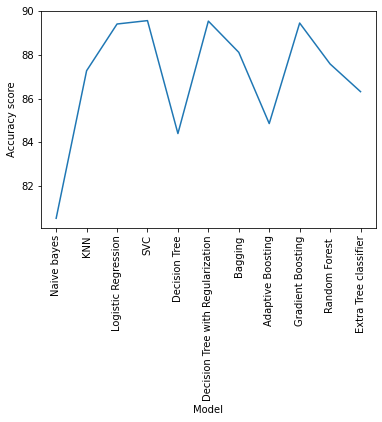

In [68]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show()


# Conclusion

## Comments on dataset:

- The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion     matrix of all models.
- The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the  -  -     confusion matrix of all models.
- Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. Which       trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
- This situation could have been avoided if the datset was balanced.
- Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome'       columns.